$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1000x_1^2 + 40x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

We shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question_2:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1000x_1^2 + 40x_1 x_2 +  x_2^2$ and its condition number. \\

Here, the function under consideration is \\
 $f(\mathbf{x}) = 1000x_1^2 + 40x_1 x_2 +  x_2^2$


$\Rightarrow f_{x_1}(\mathbf{x}) = 2000x_1 + 40x_2$ 


$\Rightarrow f_{x_1^2}(\mathbf{x}) = 2000$ 


$\Rightarrow f_{x_1x_2}(\mathbf{x}) = 40$ 


$\Rightarrow f_{x_2}(\mathbf{x}) = 40x_1 + 2x_2$ 


$\Rightarrow f_{x_2^2}(\mathbf{x}) = 2$ 


$\Rightarrow f_{x_2x_1}(\mathbf{x}) = 40$ 

$\Rightarrow\nabla^2 f(\mathbf{x}) =
\begin{bmatrix}
  f_{x_1^2}(\mathbf{x}) & 
    f_{x_1x_2}(\mathbf{x})  \\
  f_{x_2x_1}(\mathbf{x}) & 
    f_{x_2^2}(\mathbf{x})
\end{bmatrix}
=
\begin{bmatrix}
  2000 & 40 \\ 40 & 2
\end{bmatrix} = Hessian$


In [1]:
import numpy as np 

#method to find Hessian matrix
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2 
  return np.array([[2000, 40], [40, 2]])

#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  min_eigenval = min(np.linalg.eig(A)[0])
  max_eigenval = max(np.linalg.eig(A)[0])
  return max_eigenval/min_eigenval

# In particular, for A = hessian = evalh(x) = np.array([[2000, 40], [40, 2]])
print("Condition Number of the Hessian matrix for the given question is =  ",find_condition_number(np.array([[2000, 40], [40, 2]])))

Condition Number of the Hessian matrix for the given question is =   1668.0010671466666


The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

Note that the gradient $\nabla g(\mathbf{y}) = \mathbf{M}^\top \nabla f(\mathbf{My})$ and the Hessian is $\nabla^2 g(\mathbf{y}) = \mathbf{M}^\top \nabla^2 f(\mathbf{My}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 
\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla g(\mathbf{y}^{k}) \\
&= {\mathbf{y}}^{k} - \eta {\mathbf{M}}^\top \nabla f(\mathbf{M}\mathbf{y}^{k}) \\
\end{align}
Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{MM}^\top \nabla f(\mathbf{M}\mathbf{y}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla f({\mathbf{x}}^{k}) 
\end{align}

Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a useful candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\textbf{Question_4:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$ \\
Here, the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the
new gradient scheme with scaling is taken as: \\
$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$ , where $\mathbf{H^\it k}$ is the Hessian for $\ k^{th}$ iteration.

$\textbf{Question_5:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$ \\
The required diagonal matrix is: \\
\begin{equation} \ \mathbf{D}^k =
\begin{bmatrix}
\frac{1}{2000} & 0 \\ 0 & \frac{1}{2}
\end{bmatrix}
\end{equation}
which is actually the diagonal approximation to the Hessian Matrix $\nabla^2 f(\mathbf{x})$, \\
**i.e.**  $\mathbf{D}^k \ is \ a \ diagonal  \ matrix \ with \ the \ inverse \ second \ partial \ derivatives \ \Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1} \ as \ the \ diagonal \ elements.$

Write code to find the matrix $\mathbf{D}^k$. 

In [2]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  return np.array([[1/2000, 0],[0, 1/2]])

In [3]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return 1000*x[0]**2 + 40*x[0]*x[1] + x[1]**2 

In [4]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2000*x[0] + 40*x[1], 40*x[0] + 2*x[1]])
  

In [5]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  gr_t = np.matrix.transpose(gradf)
  step_length = np.matmul(gr_t, gradf)/(2*np.matmul(np.matmul(gr_t, A), gradf))
  return step_length
  

In [6]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  gr_t = np.matrix.transpose(gradf)
  #implement the backtracking line search
  while evalf(np.add(x,-alpha*gradf)) > evalf(x)-gamma*alpha*np.matmul(gr_t, gradf):
    alpha = rho*alpha
  #print('final step length:',alpha)
  return alpha

In [7]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  gr_t = np.matrix.transpose(gradf)
  #direction = -(D_k)*gradf
  #implement the backtracking line search
  while evalf(np.add(x,alpha*direction)) > evalf(x)+gamma*alpha*np.matmul(gr_t, direction):
    alpha = rho*alpha
  #print('final step length:',alpha)
  return alpha

In [8]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH_SCALING = 4

In [9]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  x = start_x
  A = (1/2)*evalh(x)
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x , k , evalf(x)

In [10]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  #A = evalh(x) 
  g_x = evalg(x)
  D_k = compute_D_k(x)
  
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SCALING):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0
  while (np.linalg.norm(g_x) > tol):
    direction = -np.matmul(D_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SCALING:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, direction, alpha_start, rho, gamma)
    else:  
      raise ValueError('Line search type unknown. Please check!')

    #implement the gradient descent steps here   
    x = np.add(x, np.multiply(step_length,direction)) #update x = x + step_length*direction
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x , k , evalf(x)  

**Q 7 and 8. SOLUTION:** \\
here, for question number 7 we were not provided with the starting point and tolerance so we took the data of these two from question number 8 and evaluated the minimizer and the function value at these points. So, we have common answer for 7th and 8th qestion. 

In [11]:
my_start_x = np.array([1.,2000.])
my_tol= 1e-9

In [12]:
#check gradient descent with exact line search 
print("For EXACT_LINE_SEARCH procedure :")
x_opt_els, k, f_value = find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer = ",x_opt_els,",Iteration = ", k,", Minimum function value = ", f_value)

#check gradient descent with backtracking line search 
print("\nFor BACKTRACKING_LINE_SEARCH WITHOUT SCALING :")
x_opt_bls, k, f_value = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.0, 0.5,0.5)
print("Minimizer = ",x_opt_bls,",Iteration = ", k , ", Minimum function value = ",f_value)

#check gradient descent with scaling and backtracking line search 
print("\nFor BACKTRACKING_LINE_SEARCH_WITH_SCALING:")
x_opt_bls, k, f_value = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING, 1.0, 0.5,0.5)
print("Minimizer = ",x_opt_bls,",Iteration = ", k , ", Minimum function value = ",f_value)

For EXACT_LINE_SEARCH procedure :
Minimizer =  [-1.27317611e-11  6.35649461e-10] ,Iteration =  109 , Minimum function value =  2.424304945700804e-19

For BACKTRACKING_LINE_SEARCH WITHOUT SCALING :
Minimizer =  [-1.28341493e-11  6.33239185e-10] ,Iteration =  540 , Minimum function value =  2.4062380391510793e-19

For BACKTRACKING_LINE_SEARCH_WITH_SCALING:
Minimizer =  [-1.44991408e-12  5.09130136e-11] ,Iteration =  68 , Minimum function value =  1.7416059877853944e-21


**Comments:** \\
1. From the above results it is obvious that the number of Iterations required to converge to the miminmum value is very small in case of Backtracking line search with scaling (which is 68) than the number of iterations in the Backtracking line search without scaling (which is 540).
2. Also the number of iterations in case of exact line search is 109 which is  little bit greater than the iterations in the Backtracking line search with scaling(68) and less than the number of iterations in backtracking line search without scaling(540). This is due to the fact that the function is quadractic and for quadratic functions Exact line search converge quickly.

**9. SOLUTION :**

In [13]:
# The behavior of gradient descent algorithm (without scaling) with backtracking line search for different alpha values.

alpha_list = [1.0, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]  # alpha values vary over this list.
itr_without_scaling = []
print("Backtracking line search (WITHOUT SCALING) for different alpha values\n")
for alpha_start in alpha_list:
  x_opt_bls, k, f_value = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, 0.5, 0.5)
  itr_without_scaling.append(k)
  print('for alpha = ',alpha_start, ',  iter:', k, ',  x: ',x_opt_bls, ',  f(x): ', f_value)

Backtracking line search (WITHOUT SCALING) for different alpha values

for alpha =  1.0 ,  iter: 540 ,  x:  [-1.28341493e-11  6.33239185e-10] ,  f(x):  2.4062380391510793e-19
for alpha =  0.9 ,  iter: 6063 ,  x:  [-1.62487293e-11  8.15947699e-10] ,  f(x):  3.9946732039019958e-19
for alpha =  0.75 ,  iter: 19009 ,  x:  [-1.49664095e-11  7.57182200e-10] ,  f(x):  3.440263427821263e-19
for alpha =  0.6 ,  iter: 8984 ,  x:  [-1.64533910e-11  8.17946468e-10] ,  f(x):  4.0143077796289474e-19
for alpha =  0.5 ,  iter: 540 ,  x:  [-1.28341493e-11  6.33239185e-10] ,  f(x):  2.4062380391510793e-19
for alpha =  0.4 ,  iter: 16947 ,  x:  [-1.56859877e-11  7.76719887e-10] ,  f(x):  3.619992489950034e-19
for alpha =  0.25 ,  iter: 540 ,  x:  [-1.28341493e-11  6.33239185e-10] ,  f(x):  2.4062380391510793e-19
for alpha =  0.1 ,  iter: 16947 ,  x:  [-1.56859877e-11  7.76719887e-10] ,  f(x):  3.619992489950034e-19
for alpha =  0.01 ,  iter: 14604 ,  x:  [-1.56028553e-11  7.70236115e-10] ,  f(x):  3.5599

In [14]:
# The behavior of gradient descent algorithm (with scaling) with backtracking line search for different alpha values.

alpha_list = [1.0, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]  # alpha values vary over this list.
itr_with_scaling = []
print("Backtracking line search (WITH SCALING) for different alpha values\n")
for alpha_start in alpha_list:
  x_opt_bls, k, f_value = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING, alpha_start, 0.5, 0.5)
  itr_with_scaling.append(k)
  print('for alpha = ',alpha_start, ',  iter:', k, ',  x: ',x_opt_bls, ',  f(x): ', f_value)

Backtracking line search (WITH SCALING) for different alpha values

for alpha =  1.0 ,  iter: 68 ,  x:  [-1.44991408e-12  5.09130136e-11] ,  f(x):  1.7416059877853944e-21
for alpha =  0.9 ,  iter: 78 ,  x:  [-1.19890098e-12  3.79125780e-11] ,  f(x):  1.0565900559456152e-21
for alpha =  0.75 ,  iter: 97 ,  x:  [-1.14523191e-12  3.62154129e-11] ,  f(x):  9.641104001989231e-22
for alpha =  0.6 ,  iter: 124 ,  x:  [-1.19243265e-12  3.77080312e-11] ,  f(x):  1.0452197339503545e-21
for alpha =  0.5 ,  iter: 152 ,  x:  [-1.22576074e-12  3.87619581e-11] ,  f(x):  1.1044633336540175e-21
for alpha =  0.4 ,  iter: 194 ,  x:  [-1.24575740e-12  3.93943079e-11] ,  f(x):  1.1407929685514457e-21
for alpha =  0.25 ,  iter: 320 ,  x:  [-1.25308107e-12  3.96259028e-11] ,  f(x):  1.1542455952635261e-21
for alpha =  0.1 ,  iter: 822 ,  x:  [-1.33322314e-12  4.21602174e-11] ,  f(x):  1.3066087705365873e-21
for alpha =  0.01 ,  iter: 8355 ,  x:  [-1.35533502e-12  4.28594566e-11] ,  f(x):  1.350309137065601e-

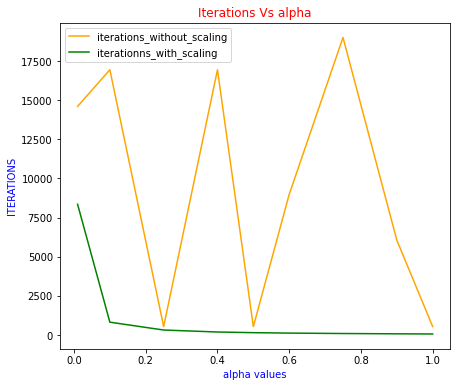

In [15]:
#plotting the number of iterations against alpha values.
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))  #plt.figure(figsize=(width,height))
plt.plot(alpha_list, itr_without_scaling,label ='iterations_without_scaling',color='orange')
plt.plot(alpha_list, itr_with_scaling,label ='iterationns_with_scaling',color='green')
plt.xlabel("alpha values",color='b')
plt.ylabel('ITERATIONS',color='b')
plt.title('Iterations Vs alpha',color='r')
plt.legend(loc='upper left')
plt.show()

**Comments:** \\
1. Here, from the above graph it is clear that, In case of Backtracking line search (with scaling) the number of iterations gradually increases for decreasing value of alpha till alpha = 0.1 after this value tne number of iterations increases suddenly to a large value. \\
2. In case of Backtracking line search (without scaling) the number of iterations keeps fluctuating with a wave like pattern for increasing alpha values. 
In other words, the number of iterations corresponding to increasing aplha value keeps increasing and decreasing alternatively.
3. Also, the Objective value and the minimizers are more accurate in case of scaling than without scaling.

**10. SOLUTION**

In [16]:
# The behavior of gradient descent algorithm (without scaling) with Backtracking line search for different rho values.

rho_list = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
itr_without_scaling = []

print("Backtracking line search (WITHOUT SCALING) for different rho values\n")
for rho in rho_list:
  x_opt_bls, k, f_value = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.0, rho, 0.5)
  itr_without_scaling.append(k)
  print('for rho = ',rho, ',  iterations = ', k, ',  minimizer = ',x_opt_bls,',  f(x) = ', f_value) 

Backtracking line search (WITHOUT SCALING) for different rho values

for rho =  0.9 ,  iterations =  1538 ,  minimizer =  [-1.65502929e-11  8.25783852e-10] ,  f(x) =  4.091525808330713e-19
for rho =  0.8 ,  iterations =  488 ,  minimizer =  [-1.47244035e-11  7.33938202e-10] ,  f(x) =  3.232012539766754e-19
for rho =  0.75 ,  iterations =  14649 ,  minimizer =  [-1.62459008e-11  8.07115533e-10] ,  f(x) =  3.908720214135941e-19
for rho =  0.6 ,  iterations =  3304 ,  minimizer =  [-1.62998612e-11  8.09904139e-10] ,  f(x) =  3.935771874360295e-19
for rho =  0.5 ,  iterations =  540 ,  minimizer =  [-1.28341493e-11  6.33239185e-10] ,  f(x) =  2.4062380391510793e-19
for rho =  0.4 ,  iterations =  14772 ,  minimizer =  [-1.60008884e-11  7.93014638e-10] ,  f(x) =  3.7734309694707333e-19
for rho =  0.25 ,  iterations =  22258 ,  minimizer =  [-1.51867622e-11  7.68127199e-10] ,  f(x) =  3.540425355690308e-19
for rho =  0.1 ,  iterations =  24232 ,  minimizer =  [-1.17309013e-11  6.00603239e-10

In [17]:
# The behavior of gradient descent algorithm (with scaling) with Backtracking line search for different rho values.

rho_list = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
itr_with_scaling = []

print("Backtracking line search (WITH SCALING) for different rho values\n")
for rho in rho_list:
  x_opt_bls, k, f_value = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING, 1.0, rho, 0.5)
  itr_with_scaling.append(k)
  print('for rho = ',rho, ',  iterations = ', k, ',  minimizer = ',x_opt_bls,',  f(x) = ', f_value) 

Backtracking line search (WITH SCALING) for different rho values

for rho =  0.9 ,  iterations =  69 ,  minimizer =  [-6.85040944e-13  2.38246400e-11] ,  f(x) =  3.8406041027703896e-22
for rho =  0.8 ,  iterations =  63 ,  minimizer =  [-9.21968269e-12  4.45378189e-10] ,  f(x) =  1.1911445691087616e-19
for rho =  0.75 ,  iterations =  67 ,  minimizer =  [-1.62792516e-12  6.37335008e-11] ,  f(x) =  2.5619646728998122e-21
for rho =  0.6 ,  iterations =  68 ,  minimizer =  [-1.16288275e-12  3.48274528e-11] ,  f(x) =  9.452379921883421e-22
for rho =  0.5 ,  iterations =  68 ,  minimizer =  [-1.44991408e-12  5.09130136e-11] ,  f(x) =  1.7416059877853944e-21
for rho =  0.4 ,  iterations =  66 ,  minimizer =  [-3.46356067e-12  1.54657502e-10] ,  f(x) =  1.4488569841349075e-20
for rho =  0.25 ,  iterations =  68 ,  minimizer =  [-3.17719226e-12  1.46467148e-10] ,  f(x) =  1.2933004532065098e-20
for rho =  0.1 ,  iterations =  73 ,  minimizer =  [-7.42134093e-12  3.66594440e-10] ,  f(x) =  8.06

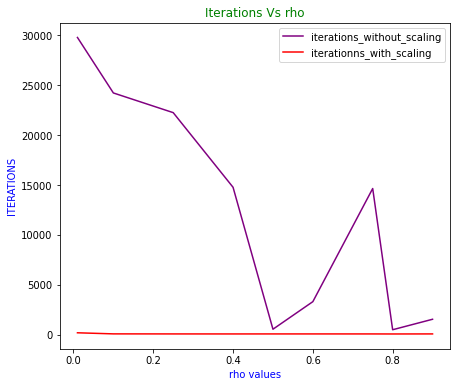

In [18]:
#plotting the number of iterations against rho values.
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))  #plt.figure(figsize=(width,height))
plt.plot(rho_list, itr_without_scaling, label ='iterations_without_scaling', color='purple')
plt.plot(rho_list, itr_with_scaling, label ='iterationns_with_scaling', color='red')
plt.xlabel("rho values",color='b')
plt.ylabel('ITERATIONS',color='b')
plt.title('Iterations Vs rho',color='g')
plt.legend(loc='upper right')
plt.show()

**Comments :** \\
1. Here, from the above graph it is clear that In the case of **Backtracking line search (without scaling)** as the value of rho increases, starting from value rho= 0.01, the number of iterations first decreases till rho = 0.5 and then increases till rho = 0.75 after that it again decreases.
2. In case of **Backtracking line search (with scaling)** the number of iterations remains constant to some extent (that is there is no huge difference in the number of iterations corresponding to distinct rho values).
3. Also, the Objective value and the minimizers are more accurate in case of scaling than without scaling.

${\Large\text{Do not forget to rename the file before submission.}}$